# Importa Bibliotecas

In [1]:
import pandas as pd 
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Dataset

**Dados Demográficos**  
- **CustomerID**: Um ID único que identifica cada cliente.  
- **Gender**: Gênero do cliente: Masculino (Male), Feminino (Female).  
- **SeniorCitizen**: Indica se o cliente tem 65 anos ou mais: 1 (Sim), 0 (Não).  
- **Partner**: Indica se o cliente tem um parceiro/companheiro(a): Sim (Yes), Não (No).  
- **Dependents**: Indica se o cliente possui dependentes (filhos, pais, etc.): Sim (Yes), Não (No).  
- **tenure**: Número de meses que o cliente permaneceu com a empresa.  

---

 **Serviços Contratados**  
- **PhoneService**: Indica se o cliente assina serviço de telefone: Sim (Yes), Não (No).  
- **MultipleLines**: Se o cliente tem múltiplas linhas telefônicas: Sim (Yes), Não (No), Sem serviço telefônico (No phone service).  
- **InternetService**: Tipo de serviço de internet: DSL, Fibra Óptica (Fiber optic), Não (No).  
- **OnlineSecurity**: Assinatura de segurança online adicional: Sim (Yes), Não (No), Sem internet (No internet service).  
- **OnlineBackup**: Backup online adicional: Sim (Yes), Não (No), Sem internet (No internet service).  
- **DeviceProtection**: Plano de proteção de dispositivos: Sim (Yes), Não (No), Sem internet (No internet service).  
- **TechSupport**: Suporte técnico premium: Sim (Yes), Não (No), Sem internet (No internet service).  
- **StreamingTV**: Streaming de TV: Sim (Yes), Não (No), Sem internet (No internet service).  
- **StreamingMovies**: Streaming de filmes: Sim (Yes), Não (No), Sem internet (No internet service).  

---

**Contrato e Pagamento**  
- **Contract**: Tipo de contrato: Mensal (Month-to-month), 1 ano (One year), 2 anos (Two year).  
- **PaperlessBilling**: Fatura digital (sem papel): Sim (Yes), Não (No).  
- **PaymentMethod**: Método de pagamento: Débito automático (Bank transfer), Cartão de crédito (Credit card), Boleto (Mailed check), Débito eletrônico (Electronic check).  
- **MonthlyCharges**: Cobrança mensal total (em dólares).  
- **TotalCharges**: Cobrança total acumulada (em dólares).  

---

**Status do Cliente (Churn)**  
- **Churn**: Indica se o cliente cancelou o serviço: Sim (Yes), Não (No).  

In [ ]:
dataset_raw = joblib.load('../data/raw/data_raw.joblib')
dataset = dataset_raw.copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Análise Descritiva

In [ ]:
# Aplica a função lambda para todas as colunas do DataFrame
for coluna in dataset.columns:
    dataset[coluna] = dataset[coluna].apply(lambda x: x if x != ' ' else np.nan)

dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset['Partner'] = pd.to_numeric(dataset['Partner'],errors='coerce')

Frequência de Churn

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


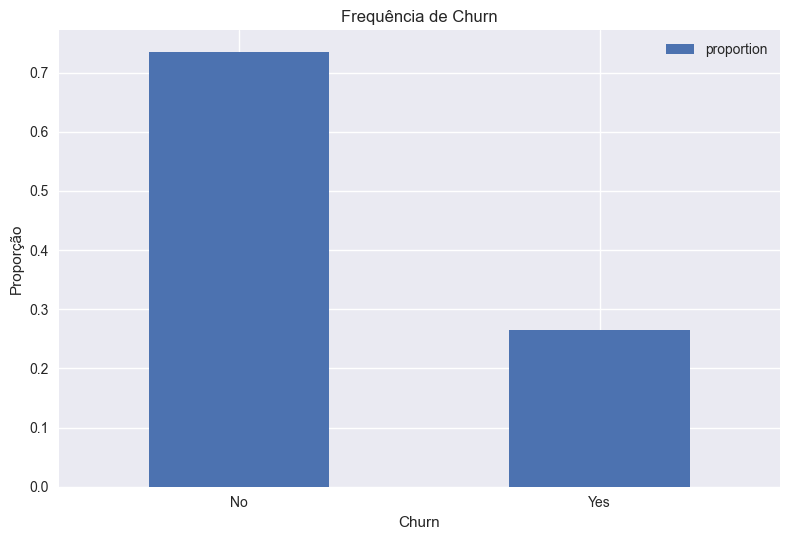

In [4]:
plt.style.use('seaborn-v0_8')
churn_freq = dataset['Churn'].value_counts(normalize=True)#.reset_index()
print(churn_freq)
churn_freq.plot.bar(x='Churn', y='proportion', legend=True, title='Frequência de Churn', 
                ylabel='Proporção', xlabel='Churn',rot=0, style='seaborn-v0_8', grid=True)
plt.tight_layout()
plt.savefig('../reports/figures/descr_churn_freq.png')
plt.show()

Pela análise da proporção de clientes que realizaram churn, observa-se um desbalanceamento entre as classes. Esse desbalanceamento deve ser considerado e tratado nas etapas de treinamento do modelo, pois pode impactar negativamente a performance e gerar vieses nas previsões.

Descrição de Dados Contínuos

In [5]:
continuous_describe = dataset[['tenure','MonthlyCharges','TotalCharges']].describe()
continuous_describe

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


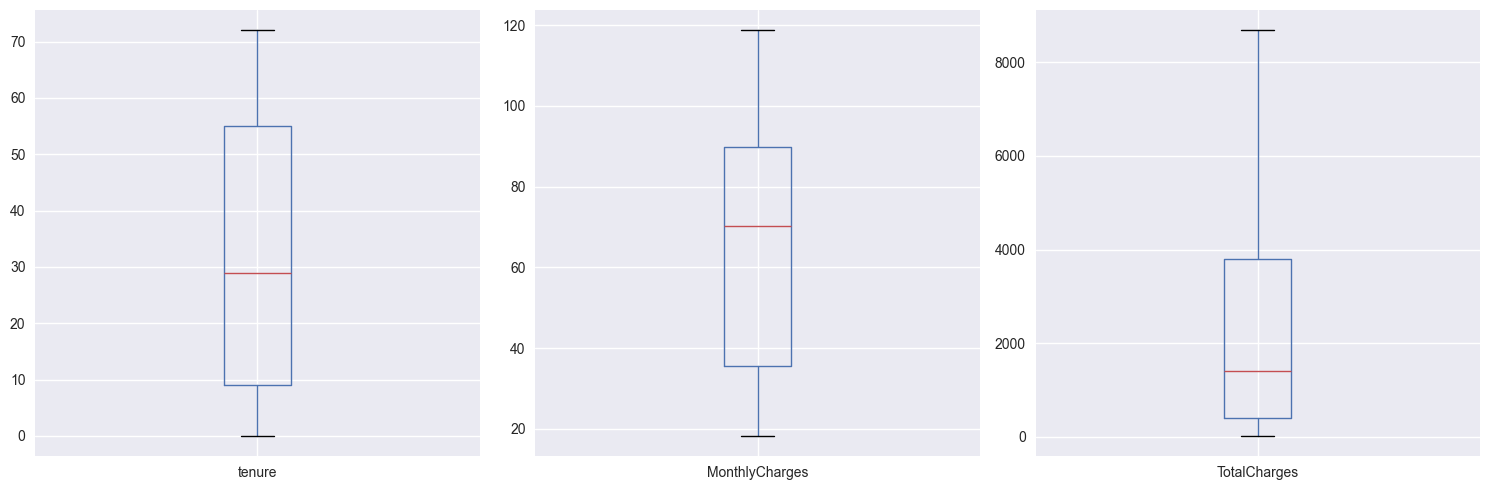

<Figure size 800x550 with 0 Axes>

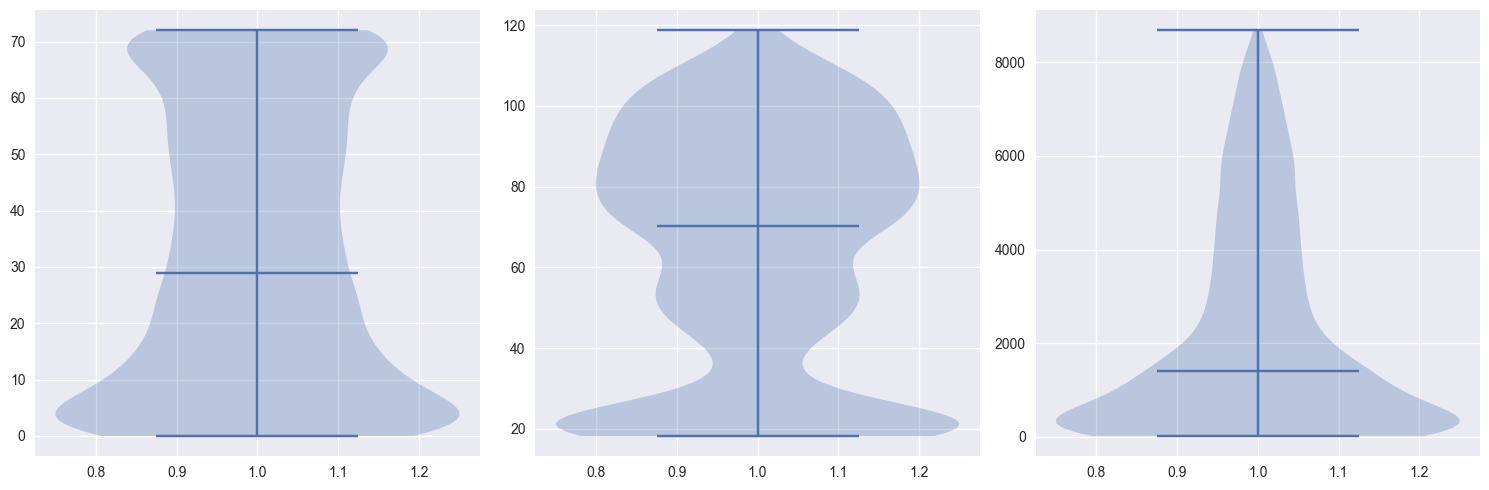

In [6]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))

for i,col in enumerate(continuous_describe.columns.tolist()):
    dataset[[col]].boxplot(ax=ax[i], rot=0)

plt.tight_layout()
plt.show()
plt.savefig('../reports/figures/descr_continuous_boxplot.png')

fig1, ax1 = plt.subplots(1,3, figsize=(15, 5))
for i,col in enumerate(continuous_describe.columns.tolist()):
    ax1[i].violinplot(dataset[col].dropna(), showmedians=True)
    ax1[i].yaxis.grid(True)
plt.tight_layout()
plt.savefig('../reports/figures/descr_continuous_violinplot.png')
plt.show()

Os dados das variáveis numéricas apresentam distribuições assimétricas, sugerindo que a utilização de quantis pode ser uma abordagem adequada para discretização dessas variáveis durante a análise ou modelagem posteriormente.

# Dados Categóricos

In [7]:
categoric_describe = dataset.describe(exclude=[np.number])
categoric_describe

,customerID,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


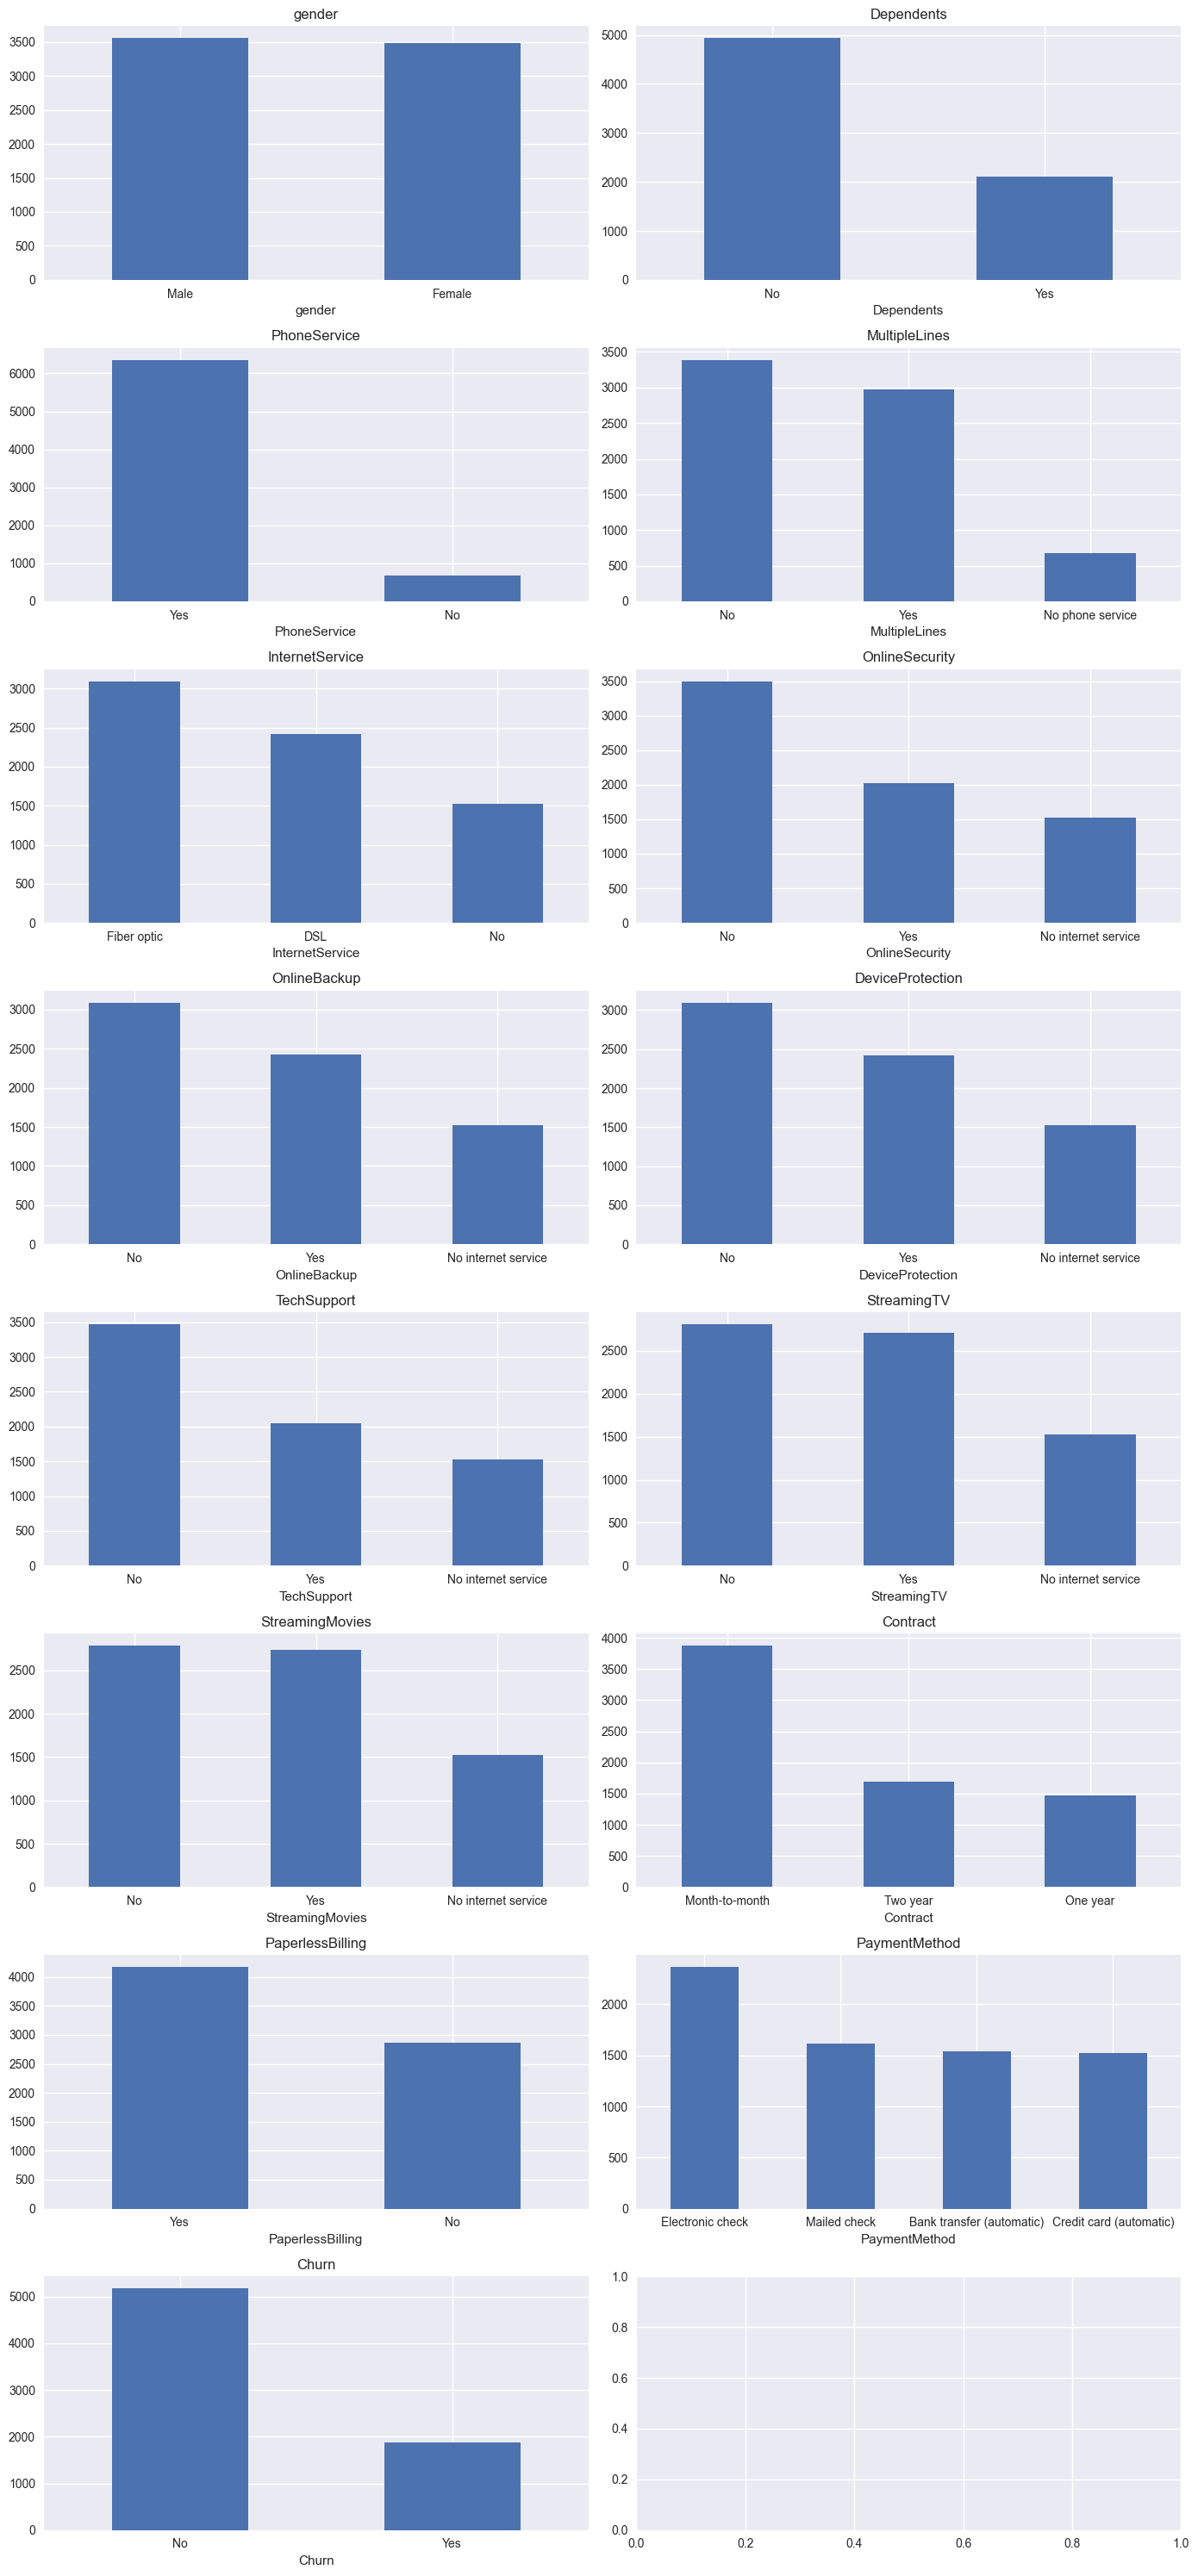

In [8]:
list_categorics = categoric_describe.columns.tolist()
list_categorics.remove('customerID')
fig, ax = plt.subplots(8,2, figsize=(14, 30))
ax=ax.flatten()
for i, col in enumerate(list_categorics):
    dataset[col].value_counts().plot.bar(ax=ax[i], title=col, rot=0, grid=True)
plt.tight_layout()
plt.savefig('../reports/figures/descr_categoric_barplot.png')
plt.show()

Já os dados categóricos apresentam, em sua maioria, até três categorias, com exceção de alguns casos que possuem até quatro. Observa-se também uma distribuição não uniforme entre as categorias, sendo o atributo PhoneService o mais desigual. Essa falta de uniformidade pode indicar variáveis menos informativas para o modelo de classificação, pois podem introduzir viés ou dificultar a generalização das previsões.

**Discretizando Variáveis Contínuas**

In [ ]:
dict_quantis_values={}
dataset_cat = dataset.copy()
for col in ['tenure','MonthlyCharges','TotalCharges']:
    categories, quantis = pd.qcut(dataset[col], q=5, retbins=True, precision=0)
    dataset_cat[col+'_cat'] = categories
    dict_quantis_values[col] = quantis
    
dataset_cat[['tenure','MonthlyCharges','TotalCharges', 
            'tenure_cat', 'MonthlyCharges_cat', 'TotalCharges_cat']]

,tenure,MonthlyCharges,TotalCharges,tenure_cat,MonthlyCharges_cat,TotalCharges_cat
0,1,29.85,29.85,"(-1.0, 6.0]","(25.0, 59.0]","(18.0, 267.0]"
1,34,56.95,1889.50,"(20.0, 40.0]","(25.0, 59.0]","(944.0, 2049.0]"
2,2,53.85,108.15,"(-1.0, 6.0]","(25.0, 59.0]","(18.0, 267.0]"
3,45,42.30,1840.75,"(40.0, 60.0]","(25.0, 59.0]","(944.0, 2049.0]"
4,2,70.70,151.65,"(-1.0, 6.0]","(59.0, 79.0]","(18.0, 267.0]"
...,...,...,...,...,...,...
7038,24,84.80,1990.50,"(20.0, 40.0]","(79.0, 94.0]","(944.0, 2049.0]"
7039,72,103.20,7362.90,"(60.0, 72.0]","(94.0, 119.0]","(4475.0, 8685.0]"
7040,11,29.60,346.45,"(6.0, 20.0]","(25.0, 59.0]","(267.0, 944.0]"
7041,4,74.40,306.60,"(-1.0, 6.0]","(59.0, 79.0]","(267.0, 944.0]"


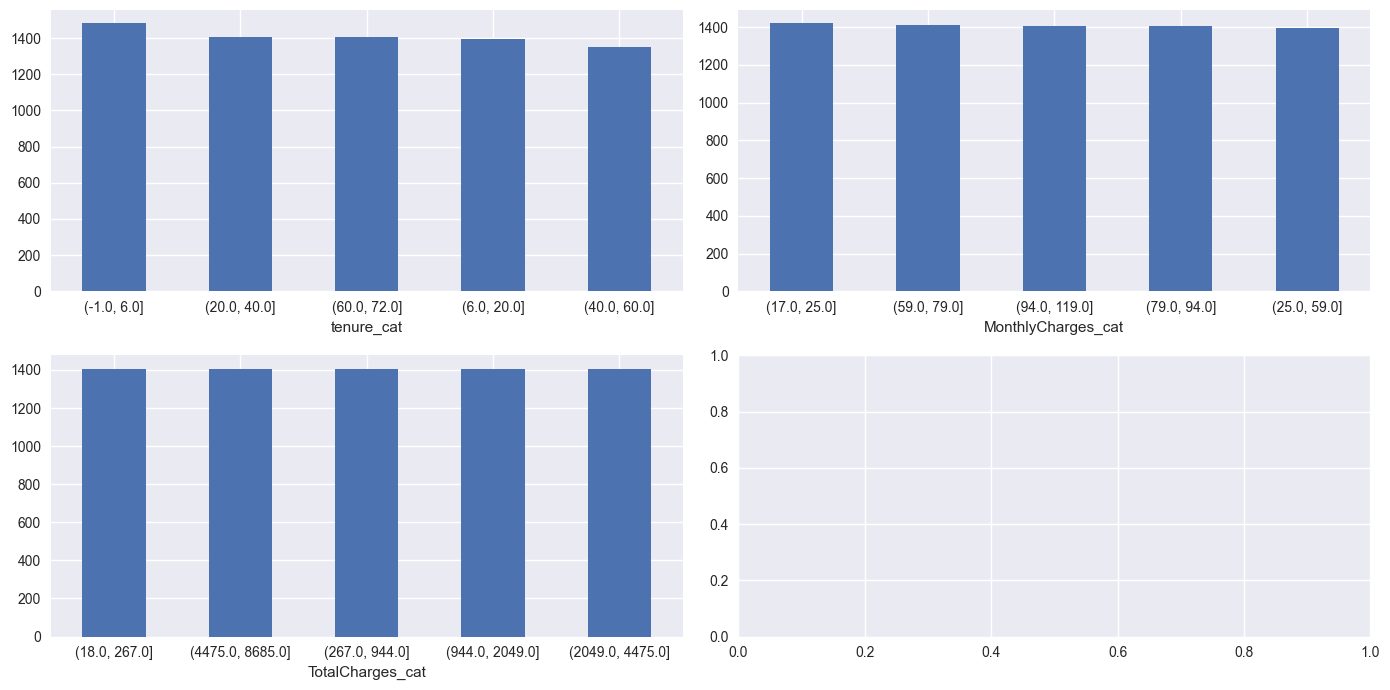

In [10]:
columns_cat = ['tenure_cat', 'MonthlyCharges_cat', 'TotalCharges_cat']
fig, ax = plt.subplots(2,2 , figsize=(14, 7))
ax = ax.flatten()

for i,col in enumerate(columns_cat):
    dataset_cat[col].value_counts().plot.bar(ax=ax[i],rot=0,grid=True)
plt.tight_layout()
plt.savefig('../reports/figures/descr_continuous_cat_barplot.png')
plt.show()

**Comparação variáveis versus CHURN**

In [11]:
categoric_values = dataset_cat.select_dtypes(exclude=[np.number])
categoric_values.reset_index(names='before_index',drop=True,inplace=True)
categoric_values.drop(columns=['customerID'], inplace=True)
categoric_values['Churn_label'] = categoric_values['Churn'].map({'Yes':1,'No':0})

joblib.dump(categoric_values,'../data/processed/dataset_treated.joblib')
categoric_values

,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_cat,MonthlyCharges_cat,TotalCharges_cat,Churn_label
0,Female,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,"(-1.0, 6.0]","(25.0, 59.0]","(18.0, 267.0]",0
1,Male,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,"(20.0, 40.0]","(25.0, 59.0]","(944.0, 2049.0]",0
2,Male,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,"(-1.0, 6.0]","(25.0, 59.0]","(18.0, 267.0]",1
3,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,"(40.0, 60.0]","(25.0, 59.0]","(944.0, 2049.0]",0
4,Female,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,"(-1.0, 6.0]","(59.0, 79.0]","(18.0, 267.0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,"(20.0, 40.0]","(79.0, 94.0]","(944.0, 2049.0]",0
7039,Female,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,"(60.0, 72.0]","(94.0, 119.0]","(4475.0, 8685.0]",0
7040,Female,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,"(6.0, 20.0]","(25.0, 59.0]","(267.0, 944.0]",0
7041,Male,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,"(-1.0, 6.0]","(59.0, 79.0]","(267.0, 944.0]",1


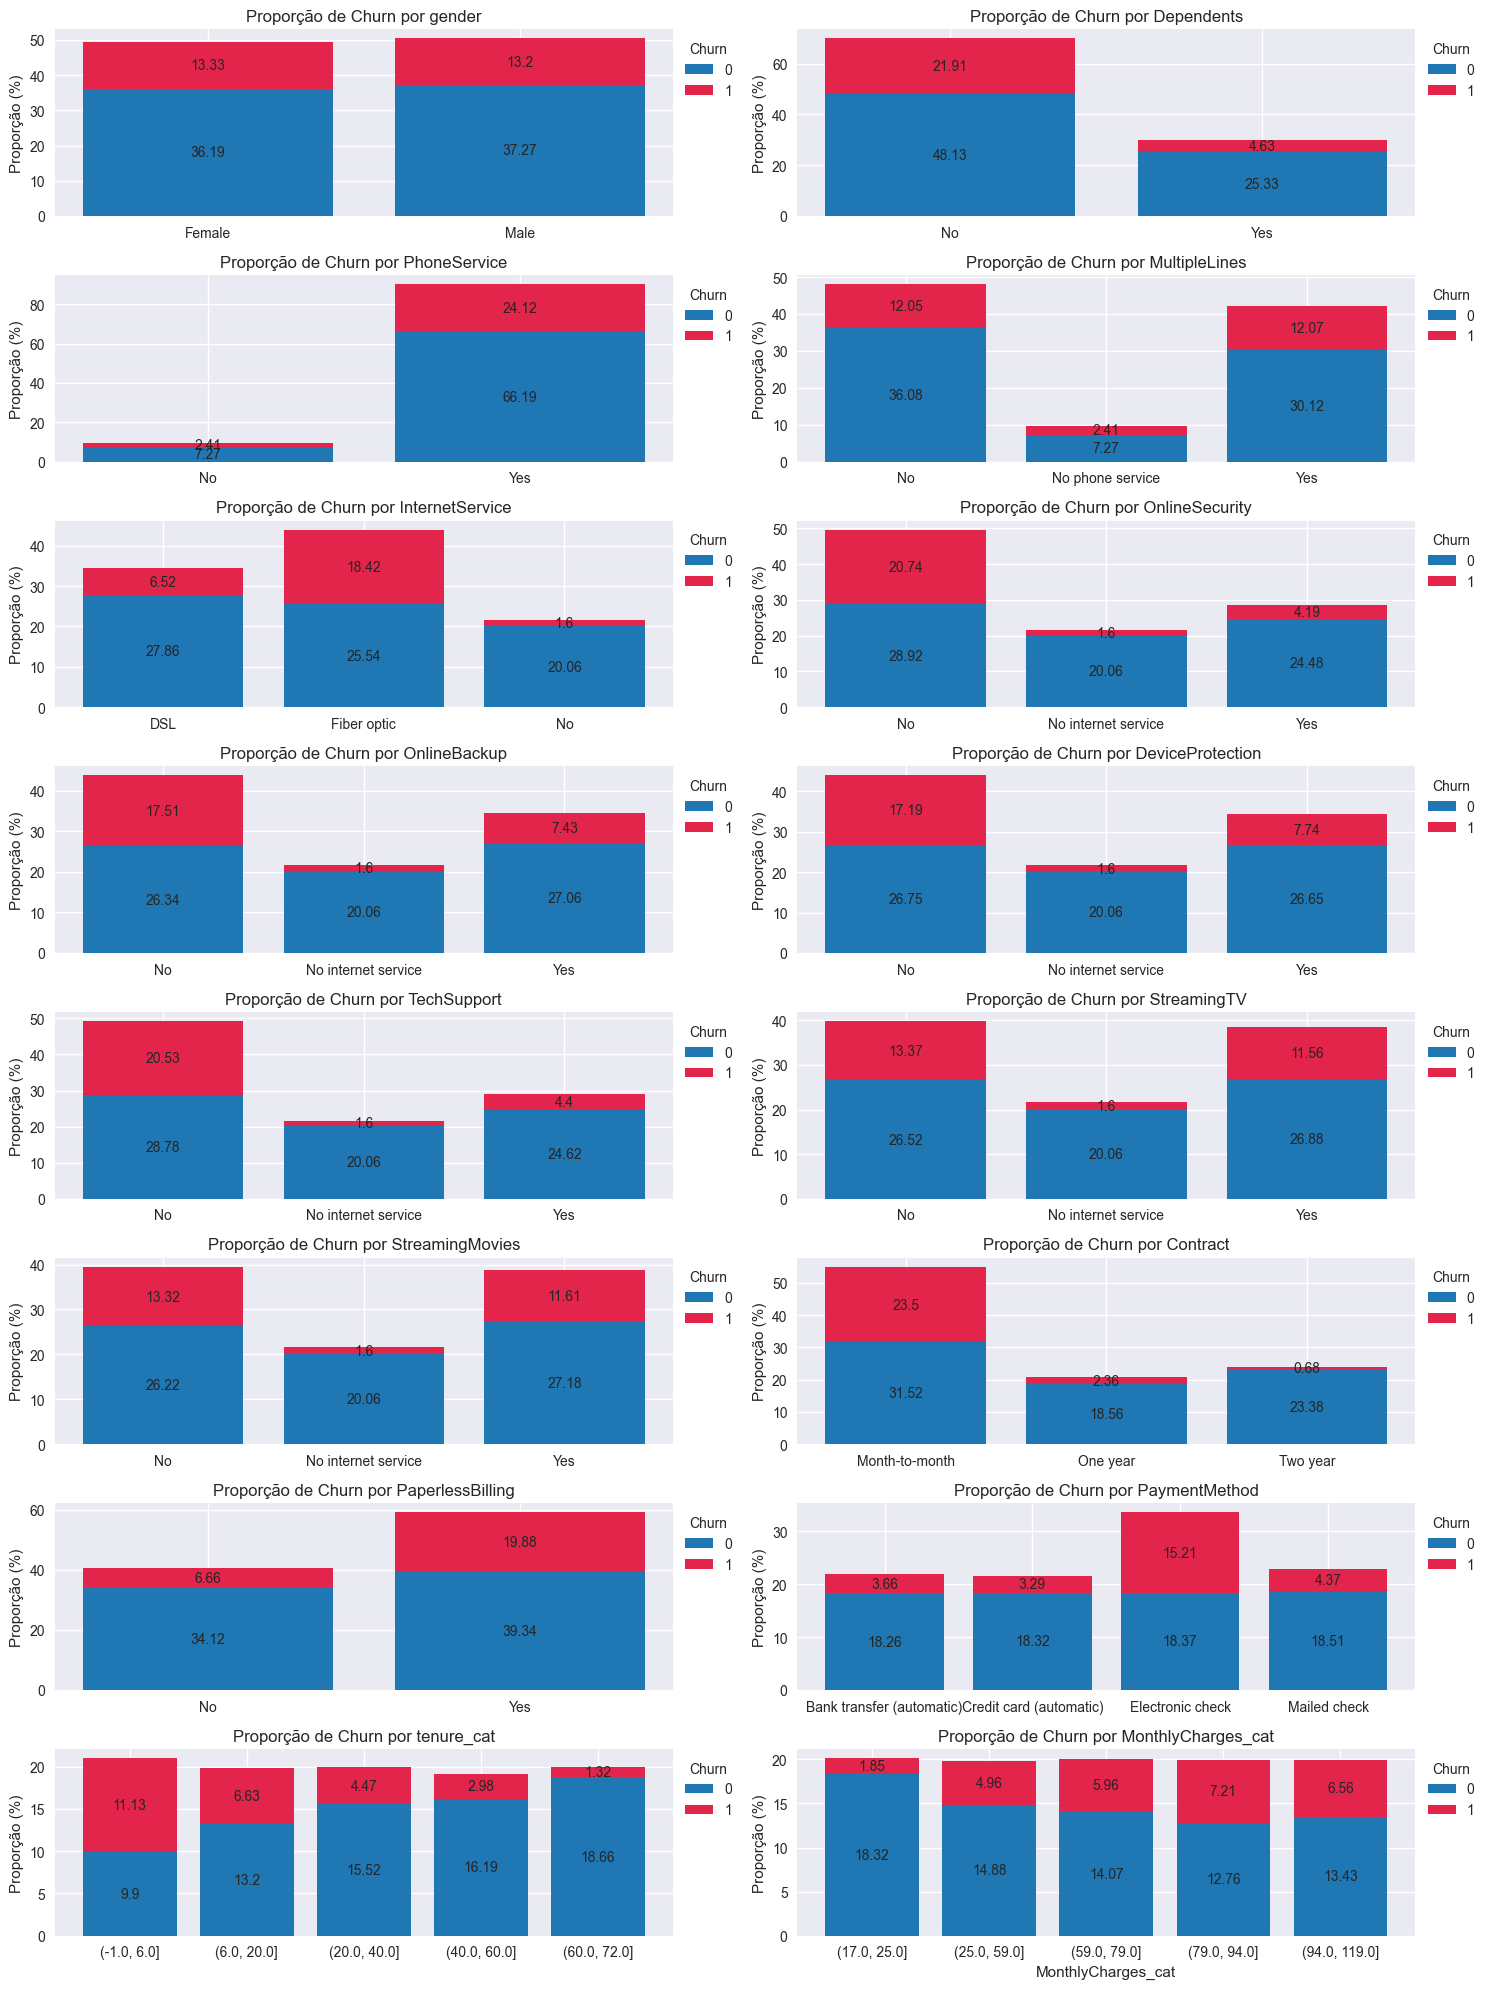

In [ ]:
def generate_graph(column, ax):
    count_per_churn = categoric_values[[column,'Churn_label']].value_counts(normalize=True).unstack()
    count_per_churn = (count_per_churn * 100).round(2)
    count_per_churn
    index_cat = categoric_values[[column,'Churn_label']].value_counts(normalize=True).unstack().index.tolist()
    index_cat = [str(i) for i in index_cat ]
    bottom = np.zeros(len(index_cat))
    colors = ['#1f77b4', "#E3254B"] 
    for i, (cat, cat_count) in enumerate(count_per_churn.items()):
        p = ax.bar(index_cat,cat_count,label=cat, bottom=bottom, color = colors[i])
        bottom += cat_count
        ax.bar_label(p, label_type='center')
        ax.set_title('Proporção de Churn por ' + column)

    ax.legend(title='Churn', loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_ylabel('Proporção (%)')
    # plt.legend(title='Churn')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show

all_columns = categoric_values.drop(columns = ['Churn','Churn_label']).columns.tolist()
fig, axs = plt.subplots( len(all_columns)//2, 2, figsize=(15,20) )
axs = axs.flatten() if len(all_columns) > 2 else [axs]
for ax, col in zip(axs,all_columns):
    generate_graph(col,ax)

plt.tight_layout()
plt.savefig('../reports/figures/descr_categoric_churn_barplot.png')
plt.show()